In [34]:
import networkx as nx
from pathlib import Path
import yaml
from dataclasses import dataclass

In [47]:
@dataclass
class MachineNode:
    machine: str
    eut: int
    dur_ticks: int

@dataclass
class IngredientNode:
    name: str
    quant: str

@dataclass
class EdgeData:
    name: str
    quant: str

In [48]:
flow_projects_path = Path('~/Dropbox/OrderedSetCode/game-optimization/minecraft/flow/projects').expanduser()
light_fuel_path = flow_projects_path / 'power/oil/light_fuel.yaml'
with open(light_fuel_path, 'r') as f:
    conf = yaml.safe_load(f)
print(conf)

G = nx.MultiDiGraph()
node_id = 0
edge_id = 0
for machine_dict in conf:
    # Add machine nodes
    machine_node_id = node_id
    G.add_node(node_id, object=MachineNode(machine_dict['m'], machine_dict['eut'], machine_dict['dur']))
    node_id += 1

    # Add ingredient nodes
    for direction in ['I', 'O']:
        print(machine_node_id, direction)
        for ingredient_name, ingredient_quantity in machine_dict[direction].items():
            G.add_node(node_id, object=IngredientNode(ingredient_name, ingredient_quantity))
            if direction == 'I':
                G.add_edge(machine_node_id, node_id, object=EdgeData(ingredient_name, ingredient_quantity))
            elif direction == 'O':
                G.add_edge(node_id, machine_node_id, object=EdgeData(ingredient_name, ingredient_quantity))
            node_id += 1
            edge_id += 1

print(G)
for x in range(G.number_of_nodes()):
    print(G.nodes[x])

[{'m': 'chemical reactor', 'tier': 'LV', 'I': {'hydrogen': 2000, 'sulfuric light fuel': 12000}, 'O': {'hydrogen sulfide': 1000, 'light fuel': 12000}, 'eut': 30, 'dur': 8, 'group': 'oil'}, {'m': 'distillery', 'tier': 'LV', 'I': {'oil': 25}, 'O': {'sulfuric light fuel': 25}, 'eut': 24, 'dur': 1, 'group': 'oil', 'number': 1}, {'m': 'electrolyzer', 'tier': 'LV', 'I': {'water': 3000}, 'O': {'hydrogen': 1000, 'oxygen': 500}, 'eut': 30, 'dur': 50, 'group': 'hydrogen'}]
0 I
0 O
5 I
5 O
8 I
8 O
MultiDiGraph with 12 nodes and 9 edges
{'object': MachineNode(machine='chemical reactor', eut=30, dur_ticks=8)}
{'object': IngredientNode(name='hydrogen', quant=2000)}
{'object': IngredientNode(name='sulfuric light fuel', quant=12000)}
{'object': IngredientNode(name='hydrogen sulfide', quant=1000)}
{'object': IngredientNode(name='light fuel', quant=12000)}
{'object': MachineNode(machine='distillery', eut=24, dur_ticks=1)}
{'object': IngredientNode(name='oil', quant=25)}
{'object': IngredientNode(name='su

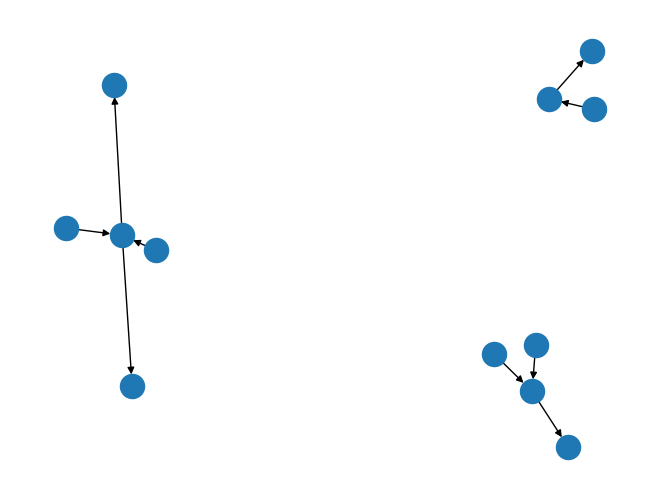

In [43]:
nx.draw(G)

In [42]:
ag = nx.nx_agraph.to_agraph(G)
ag.draw("proto.pdf", prog='dot')